# Homework 02

## Linear Regression  by 20175437 신준섭 

In [135]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# make figures to plot or scatter somethings
def make_fig():
    fig, ax = plt.subplots(1, figsize=(3, 5))   # make the figure
    ax.set_xlim([-0.5, 2.5])                    # x-axis limits
    ax.set_ylim([-0.5, 4.5])                    # y-axis limites

    plt.axhline(0, color='gray')                # axis colors
    plt.axvline(0, color='gray')                # axis colors

    return fig, ax

## Defining the linear model
The linear model that we want to test the regresion
$$\hat{y}(x) = ax+b$$


Defining $a = 2, b = 1$ for true value
$$\hat{y}(x) = 2x+1$$


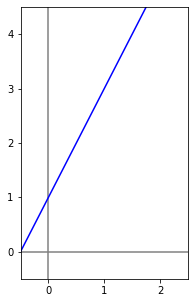

In [136]:
a, b= 2, 1

x = np.arange(-1, 3, 0.1)                   # x values
y = a * x + b                               # coressponding y in linear model

fig, ax = make_fig()                        # make figure

ax.plot(x, y, color='blue')                 # plot the linear model

fig.show()

## Generating datas with noises

gaussian noise $n \sim \mathcal{N}(0, {\sigma}^2)$ applied $y=\hat{y}+n$
    where $\sigma = 0.4$

$m$ point pairs $\{(x^{i}, y^{i})\}^{m}_{i=1}$ where I set $m = 100$

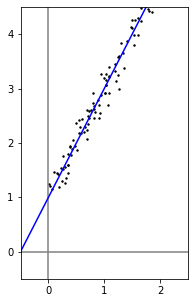

In [137]:
m = 100                     # number of noised datas
mu, sigma = 0, 0.2          # gaussian noise parameters

# making the moise
data_x = 2.0 * np.random.sample((m))
data_y = a * data_x + b + np.random.normal(mu, sigma, m)

fig, ax = make_fig()        # make figure

ax.plot(x, y, color='blue')                     # plot the true line
ax.scatter(data_x, data_y, c='black', s=2)    # plot the noised data

fig.show()

## Linear model hypothesis
We define the linear model hypothesis as
$$h_{\theta}(x)=\theta_{1}x + \theta_0$$

For the initial hypothesis $\theta$ value
$$\theta_1 = 0,\theta_0=0$$

Defining the objective function, which we optimize, to the sum of squared error
$$ J(\theta)= \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{}(i))^2 $$ 

In [138]:
def getLoss(h, y, loss_list):
    loss = (1.0/(2*len(h)))*np.sum( np.power(h-y, 2))
    loss_list.append(loss)
    return loss

To optimize th objective functions, we can use gradient descent by partial derivatives of the objective functions

$$\theta^{(t+1)}_0 := \theta^{(t)}_0 - \alpha \frac{1}{m}\sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})$$
$$\theta^{(t+1)}_1 := \theta^{(t)}_1 - \alpha \frac{1}{m}\sum^{m}_{i=1}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}$$

with the learning rate  $\alpha$

In [139]:
def gradient_descent(t0, t1, lr, h, y):
    new_t0 = t0 - lr * 1/len(h) * np.sum(h-y)
    new_t1 = t1 - lr * 1/len(h) * np.sum((h-y)* h) 
    return new_t0, new_t1

Iteratively operate gradient descent until the objective function $J({\theta})$ converges

for the numerically method, and since the noise cannot converge equilavent to $0$, setting the convergence condition to checking the loss value be smaller than a samll number
$$convergence : J(\theta) < \epsilon$$

for the learning rate $\alpha = 0.001$

iterations : 6788
hypothesis theta 1 = 1.8280767340805382
hypothesis theta 2 = 1.1851643248392028


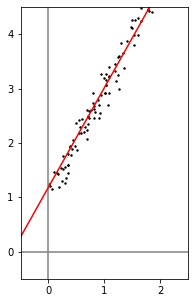

In [140]:
alpha = 0.001           # learning reate
eps = 0.02              # eplsilon(small number) to check the convergence
fig, ax = make_fig()

#hypothesis history
th_0s = []
th_1s = []
th_0, th_1 = 0.0, 0.0       # hypothesis parameters
h = th_1 * data_x + th_0    # hypothesis values

it_count = 0                # iteration counts
losses = []                 # loss of each iterations
while getLoss(h, data_y, losses) > eps: # check the loss if converges
    # gradient descent to assign a new hypothesis parameter
    th_0, th_1 = gradient_descent(th_0, th_1, alpha, h, data_y)
    th_0s.append(th_0)
    th_1s.append(th_1)
    h = th_1 * data_x + th_0    # new hypothesis values
    it_count = it_count + 1
    
h_y = th_0 + th_1 * x       # the result

ax.scatter(data_x, data_y, c='black', s=2)      # plot the noised data
ax.plot(x, h_y, color='red')                    # plot the hypothesis

print("iterations : " + str(it_count))
print("hypothesis theta 1 = "+ str(th_1))
print("hypothesis theta 2 = "+ str(th_0))

fig.show()



## Energy values
To check the convergence intuitively, just plotting the loss at every iteration can help

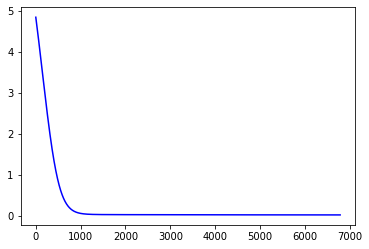

In [141]:
iter_x = list(range(0, it_count+1))

plt.plot(iter_x, losses, color='blue')

plt.show()

## Model parameter convergence

Cecking the parameter $\theta_0, \theta_1$ convergence

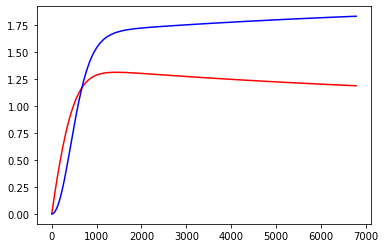

In [142]:

iter_x = list(range(0, it_count))
plt.plot(iter_x,th_0s, color='red')
plt.plot(iter_x,th_1s, color='blue')

plt.show()